# MA 440 Data Mining
# Lecture 21: Random Forest

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

## Random Forest

Random forest is a generalization of the decision tree algorithm.

1. Random Forest is a combination of multiple decision tree model.
2. The final prediction of the random forest algorithm is obtained after combining the prediction of individual decision trees.
3. Random forest solves the problem of overfitting very common with decision tree model.

## Decision Tree vs Random Forest vs Logistic Regression

## Loading the dataset

In [2]:
D = load_breast_cancer()
X = D.data
y = D.target

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.5,stratify = y,random_state = 100)

### 1.1 Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
clf = RandomForestClassifier(random_state=0)

In [6]:
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [7]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9649122807017544

### 1.2 Decision Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [10]:
ypred = clf.predict(X_test)
accuracy_score(y_test,ypred)

0.9298245614035088

### 1.3 Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [13]:
ypred = clf.predict(X_test)
accuracy_score(y_test,ypred)

0.9473684210526315

## 1.2 More options in Random Forest

In [14]:
clf = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth= 10,
    min_samples_split= 3,
    min_samples_leaf= 2)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3)

In [15]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9578947368421052

### Why is random forest better than Decision Trees

#### 1. Lets vary the number of trees in the forest to see how it affects the performance

In [16]:
tree = np.arange(1,50)
acc = []
for i in tree:
    clf = RandomForestClassifier(random_state=0, n_estimators=i)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    acc.append(accuracy)

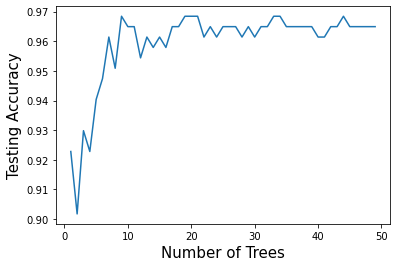

In [17]:
plt.plot(tree,acc)
plt.ylabel('Testing Accuracy',size = 15)
plt.xlabel('Number of Trees',size = 15)
plt.show()

In [18]:
ind = np.argmax(np.array(acc))
clf = RandomForestClassifier(random_state=0, n_estimators=tree[ind])
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.968421052631579

Hence increasing the trees is definitely improving the performance on testing/unseen data

In [19]:
tree = np.arange(1,50)
acc = []
for i in tree:
    clf = RandomForestClassifier(random_state=0, n_estimators=i)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_train)
    accuracy = accuracy_score(y_train,pred)
    acc.append(accuracy)

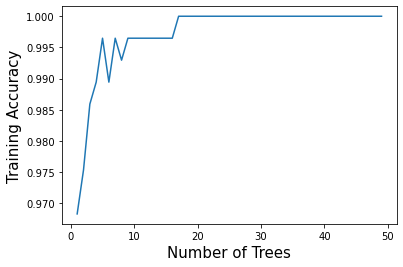

In [20]:
plt.plot(tree,acc)
plt.ylabel('Training Accuracy',size = 15)
plt.xlabel('Number of Trees',size = 15)
plt.show()

#### 2. Lets vary the depth

In [21]:
max_depth = np.arange(1,50)
acc = []
for i in max_depth:
    clf = RandomForestClassifier(random_state=0,max_depth=i)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    acc.append(accuracy)

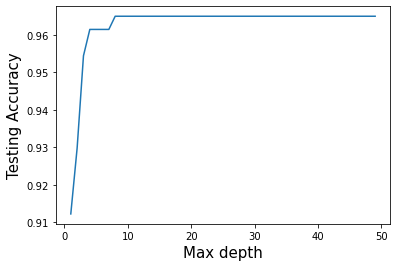

In [22]:
plt.plot(max_depth,acc)
plt.ylabel('Testing Accuracy',size = 15)
plt.xlabel('Max depth',size = 15)
plt.show()

In [23]:
ind = np.argmax(np.array(acc))
clf = RandomForestClassifier(random_state=0, max_depth=max_depth[ind])
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9649122807017544

In [24]:
## Effect of max depth variation on training set

In [25]:
max_depth = np.arange(1,50)
acc = []
for i in max_depth:
    clf = RandomForestClassifier(random_state=0,max_depth=i)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_train)
    accuracy = accuracy_score(y_train,pred)
    acc.append(accuracy)

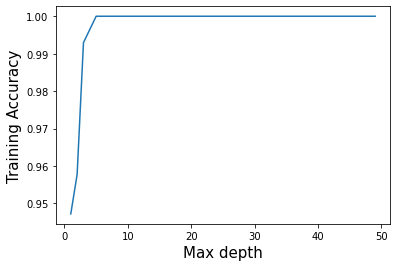

In [26]:
plt.plot(max_depth,acc)
plt.ylabel('Training Accuracy',size = 15)
plt.xlabel('Max depth',size = 15)
plt.show()

### <mark style="background-color: #FFFF00">Exercise</mark>

1. Try varying other parameter and observe the effect on performance on testing set